In [22]:
%matplotlib inline
import thinkstats2
import thinkplot
import scatter
import matplotlib.pyplot as plt
import math
import random
import pandas
import nsfg
import numpy as np

In [10]:
preg = nsfg.ReadFemPreg()
preg.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [11]:
df = preg.dropna(subset=['agepreg', 'totalwgt_lb'])
df = df[['agepreg', 'totalwgt_lb']]

In [12]:
print "pearson", thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
print "spearman", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

pearson 0.0688339703541
spearman 0.0946100410966


In [20]:
age_cdf = thinkstats2.Cdf(df.agepreg)
wgt_cdf = thinkstats2.Cdf(df.totalwgt_lb)
print 'Fraction between 15yo and 40yo: ', age_cdf[40] -age_cdf[15]

Fraction between 15yo and 40yo:  0.98904624917


In [28]:
bins = np.arange(15, 40, 1)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)
ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

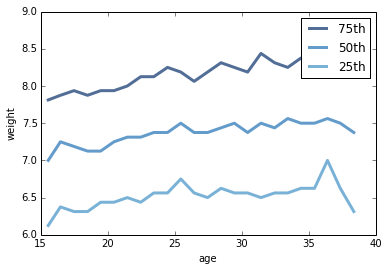

In [31]:
thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
thinkplot.show(xlabel='age', ylabel='weight')

There's a weak positive correlation between age and birth weight.